[数据来源](https://tianchi.aliyun.com/competition/entrance/231784/score)

# 1.特征工程
    - 处理源数据
    - 特征转换
    - 构造新特征

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from operator import itemgetter
%matplotlib inline

In [3]:
train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('used_car_testB_20200421.csv', sep=' ')

## 1.1异常值处理

In [4]:
#power此处不做处理，后面特征中会取对数
numerical_features = ['kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 
                      'v_7','v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
#超过三倍标准差的视为异常值，并替换为空值，之后以平均值替换
for i in numerical_features:
    m = train[i].mean()
    std = train[i].std()
    #获取异常值index
    outliers_index = train[i][train[i].map(lambda x: abs(x-m)>3*std)].index
    train.loc[outliers_index,[i]] = np.nan
    print(i,len(outliers_index))

kilometer 1840
v_0 3601
v_1 0
v_2 4506
v_3 242
v_4 446
v_5 4506
v_6 0
v_7 4506
v_8 28
v_9 343
v_10 217
v_11 4506
v_12 895
v_13 264
v_14 2246


## 1.2空值处理

In [5]:
#EDA后知道['model', 'bodyType', 'gearbox', 'fuelType', 'notRepairedDamage']存在空值
train = train.dropna(subset=['model'])
train.model.shape

(149999,)

In [6]:
nan_columns = ['bodyType', 'gearbox', 'fuelType']
for i in nan_columns:
    print(train[i].value_counts())

0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6481
7.0     1289
Name: bodyType, dtype: int64
0.0    111623
1.0     32395
Name: gearbox, dtype: int64
0.0    91656
1.0    46990
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64


In [7]:
from sklearn.impute import SimpleImputer

nan_columns = ['bodyType', 'gearbox', 'fuelType']

#分类型用众数填充
for i in nan_columns:
    temp = train[i].values.reshape(-1,1)
    train[i] = SimpleImputer(strategy='most_frequent').fit_transform(temp)
    
numerical_features = ['power', 'kilometer', 
                    'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
                    'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
#数值型用平均数填充
for i in numerical_features:
    temp = train[i].values.reshape(-1,1)
    train[i] = SimpleImputer(strategy='mean').fit_transform(temp)
    

In [8]:
# from sklearn.ensemble import RandomForestRegressor

# train_ = train.copy()
# df_0 = train_.iloc[:,train.columns != 'bodyType']
# #找出训练集测试集
# y_train = train_['bodyType'][train_['bodyType'].notnull()]
# y_test = train_['bodyType'][train_['bodyType'].isnull()]
# xtrain = df_0.values[ytrain.index,:]
# xtest = df_0[ytest.index,:]
# #用随机森林回归填补缺失值
# rfc = RandomForestRegressor(n_estimators=100)
# rfc = rfc.fit(xtrain, ytrain)
# ypredict = rfc.predict(xtest)

# #将预测好的值返回原始矩阵
# x_missing_reg.loc[x_missing_reg.iloc[:,i].isnull(),i] = ypredict

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149999 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             149999 non-null  int64  
 1   name               149999 non-null  int64  
 2   regDate            149999 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              149999 non-null  int64  
 5   bodyType           149999 non-null  float64
 6   fuelType           149999 non-null  float64
 7   gearbox            149999 non-null  float64
 8   power              149999 non-null  float64
 9   kilometer          149999 non-null  float64
 10  notRepairedDamage  149999 non-null  object 
 11  regionCode         149999 non-null  int64  
 12  seller             149999 non-null  int64  
 13  offerType          149999 non-null  int64  
 14  creatDate          149999 non-null  int64  
 15  price              149999 non-null  int64  
 16  v_

In [10]:
#融合train， test 方便数据处理。
train['train'] = 1
test['train'] = 0
data = pd.concat([train, test], ignore_index=True, sort=False)

In [11]:
#‘-’应为空值，替换为nan，并修改数据类型
data.notRepairedDamage.replace('-', -1, inplace=True)
data['notRepairedDamage'] = data['notRepairedDamage'].astype('float64')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199999 entries, 0 to 199998
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             199999 non-null  int64  
 1   name               199999 non-null  int64  
 2   regDate            199999 non-null  int64  
 3   model              199999 non-null  float64
 4   brand              199999 non-null  int64  
 5   bodyType           198495 non-null  float64
 6   fuelType           197075 non-null  float64
 7   gearbox            198031 non-null  float64
 8   power              199999 non-null  float64
 9   kilometer          199999 non-null  float64
 10  notRepairedDamage  199999 non-null  float64
 11  regionCode         199999 non-null  int64  
 12  seller             199999 non-null  int64  
 13  offerType          199999 non-null  int64  
 14  creatDate          199999 non-null  int64  
 15  price              149999 non-null  float64
 16  v_

In [13]:
del data["seller"]
del data["offerType"]

# 2.特征构造

In [14]:
#汽车使用时间
data['used_time'] = pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')
data['used_time_day'] = data['used_time'].astype('timedelta64[D]').astype(float)
data['used_time_day'] = data['used_time_day'].fillna(data['used_time_day'].mean())
del data['used_time']

In [15]:
#对power取对数
data['power'] = np.log(data['power'] + 1)

<AxesSubplot:ylabel='Frequency'>

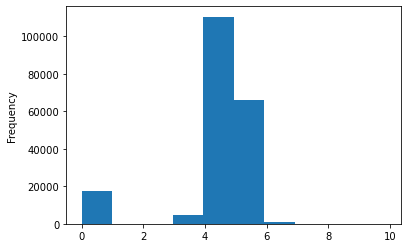

In [16]:
data['power'].plot.hist()

In [17]:
#分箱增强robust
from sklearn.preprocessing import KBinsDiscretizer

split_fea = ['power','used_time_day']
data_split_fea = data.loc[:,split_fea]
bins = KBinsDiscretizer(n_bins=30,encode='ordinal',strategy='uniform').fit_transform(data_split_fea)
data.loc[:,split_fea] = bins

In [18]:
#对数值型数据进行归一化处理
from sklearn.preprocessing import MinMaxScaler
#power已经分箱不再归一
# numerical_features.remove('power')

data_ = data.loc[:,numerical_features]

scaler = MinMaxScaler()
result = scaler.fit_transform(data_)
data.loc[:,numerical_features] = result

In [19]:
data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,train,used_time_day
0,0,736,20040402,30.0,6,1.0,0.0,0.0,0.413793,0.827586,...,0.091777,0.144905,0.461239,0.294499,0.346245,0.270846,0.505762,0.793125,1,14.0
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0.000000,1.000000,...,0.096157,0.168918,0.097403,0.199930,0.317300,0.334986,0.248644,0.717437,1,15.0
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,0.517241,0.827586,...,0.116997,0.394854,0.128132,0.202447,0.305326,0.454737,0.339524,0.663663,1,14.0
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,0.551724,1.000000,...,0.086404,0.212086,0.000000,0.218241,0.284157,0.359372,0.175563,0.635532,1,23.0
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,0.413793,0.310345,...,0.065092,0.500575,0.575162,0.340670,0.268814,0.425479,0.713995,0.907205,1,4.0


In [20]:
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 
                        'gearbox','notRepairedDamage']
for i in categorical_features:
    print(train[i].value_counts().shape)

(248,)
(40,)
(8,)
(7,)
(2,)
(3,)


In [21]:
#对分类型数据进行one——hot编码(name,regioncode太多不分类）（pandas更方便）
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 
                        'gearbox','notRepairedDamage']
data = pd.get_dummies(data, columns=categorical_features)
print(data.shape)
data.columns

(199999, 333)


Index(['SaleID', 'name', 'regDate', 'power', 'kilometer', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1',
       ...
       'fuelType_2.0', 'fuelType_3.0', 'fuelType_4.0', 'fuelType_5.0',
       'fuelType_6.0', 'gearbox_0.0', 'gearbox_1.0', 'notRepairedDamage_-1.0',
       'notRepairedDamage_0.0', 'notRepairedDamage_1.0'],
      dtype='object', length=333)

In [22]:
# #对分类型数据进行one——hot编码，sklearn
# categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 
#                         'gearbox', 'regionCode']
# from sklearn.preprocessing import OneHotEncoder
# data_ = data.loc[:,categorical_features]
# result = OneHotEncoder(categories='auto').fit_transform(data_).toarray()
# data.loc[:,categorical_features] = result
# data.head()

In [23]:
# #分离数据集
# feature_columns = [col for col in data.columns if col not in ['SaleID', 'price','train']]
# train = data[data['train'] == 1]
# test = data[data['train'] == 0]

# del train['train']
# del test['train']

# xtrain = train.loc[:,feature_columns]
# ytrian = train['price']
# xtest = test.loc[:,feature_columns]

In [24]:
#特征过滤，通常使用嵌入式，这里选择方差过滤进行简单过滤
from sklearn.feature_selection import VarianceThreshold
x = VarianceThreshold().fit_transform(data)
x.shape

(199999, 333)

可以看到如果默认方差为0那无需过滤了

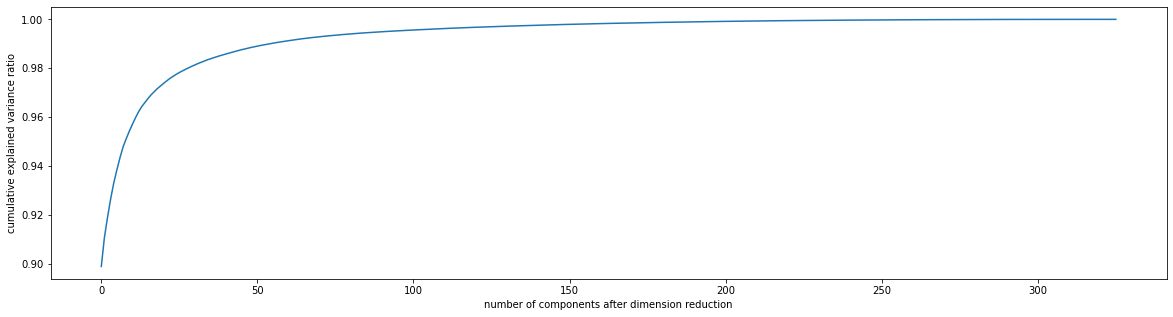

In [25]:
#pca降维
data = data.astype('float64')
feature_columns = [col for col in data.columns if col not in ['SaleID', 'price','train','regDate','creatDate','regionCode','name']]
data_fea = data.loc[:, feature_columns]

from sklearn.decomposition import PCA

pca_line = PCA().fit(data_fea)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [26]:
#分离数据集
train = data[data['train'] == 1]
test = data[data['train'] == 0]

del train['train']
del test['train']

xtrain = train.loc[:,feature_columns]
ytrain = train['price']
xtest = test.loc[:,feature_columns]

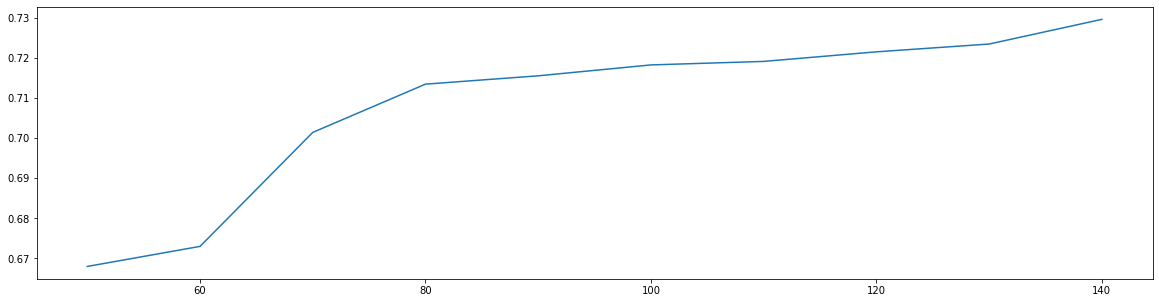

In [27]:
#细化学习曲线
# from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import cross_val_score

score = []
for i in range(50,150,10):
    pca_line_temp = PCA(i).fit_transform(xtrain)
    once = cross_val_score(LR(), pca_line_temp,ytrain,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(50,150,10),score)
plt.show()

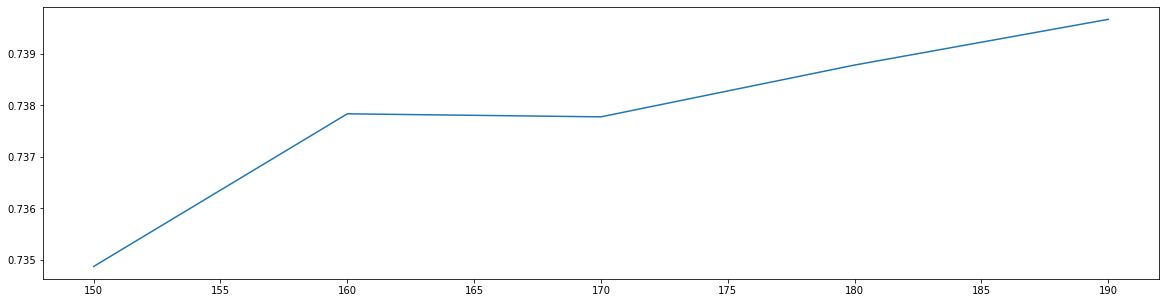

In [28]:
#进一步细化学习曲线
score = []
for i in range(150,200,10):
    pca_line_temp = PCA(i).fit_transform(xtrain)
    once = cross_val_score(LR(), pca_line_temp,ytrain,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(150,200,10),score)
plt.show()

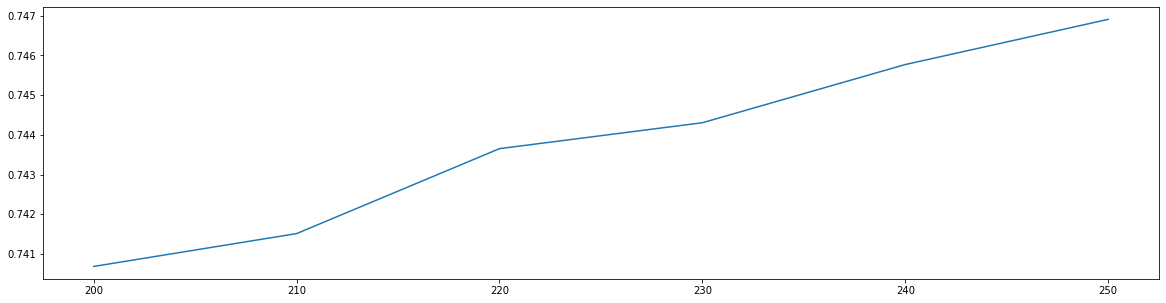

In [29]:
#进一步细化学习曲线
score = []
for i in range(200,260,10):
    pca_line_temp = PCA(i).fit_transform(xtrain)
    once = cross_val_score(LR(), pca_line_temp,ytrain,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(200,260,10),score)
plt.show()

可以看出来总体一直在提升，不过考虑到时间成本，选择为160最为合适

In [30]:
xtrain_dc = PCA(160).fit_transform(xtrain)
xtest_dc = PCA(160).fit_transform(xtest)

In [31]:
xtrain_dc_ = pd.DataFrame(xtrain_dc)
xtest_dc = pd.DataFrame(xtest_dc)

In [32]:
ytrain = pd.DataFrame(ytrain)

In [33]:
xtrain.to_csv('xtrain.csv',index=0)
xtest.to_csv('xtest.csv',index=0)
ytrain.to_csv('ytrain.csv',index=0)
xtrain_dc_.to_csv('xtrain_dc_.csv',index=0)
xtest_dc.to_csv('xtest_dc.csv',index=0)

# 3.建模分析并调参

In [49]:
xtrain = pd.read_csv("xtrain.csv")
xtest = pd.read_csv("xtest.csv")
xtrain_dc = PCA(160).fit_transform(xtrain)
xtest_dc = PCA(160).fit_transform(xtest)
ytrain = train['price']

In [34]:
#已经测试过了，回归类和支持向量机的分数都远逊于lgb和xgboost故直接放弃

In [35]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

In [41]:
# #LGBMRegressor
# #RandomizedSearchCV
# #先用随机搜索确立一个可能的局部最优值，再用网格搜索确定
# #电脑性能不行，实在太慢，换贪心调参了
# from lightgbm.sklearn import LGBMRegressor

# parameters =  {'objective': ['regression', 'regression_l1', 'mape', 'huber', 'fair'], 
#                'num_leaves':[*range(10,100,10)], 
#                'max_depth': [*range(10,100,10)],
#                'n_estimators':[200,300,500,900]
# } 

# model = LGBMRegressor(learning_rate=0.03)

# lgb_random = RandomizedSearchCV(model, parameters,
#                               n_iter = 100, scoring='neg_mean_absolute_error', 
#                               cv = 3, verbose=2, random_state=42, n_jobs=-1)

# lgb_random.fit(xtrain_dc, ytrain)
# lgb_random.best_params_

In [50]:
#贪心调参
from lightgbm.sklearn import LGBMRegressor

objective = ['regression', 'regression_l1', 'mape', 'huber', 'fair']
num_leaves = [3,5,10,15,20,40, 55]
max_depth = [3,5,10,15,20,40, 55]
feature_fraction = [0.5, 0.6, 0.7, 0.8, 0.9]
bagging_fraction = [0.6, 0.7, 0.8, 0.9, 1.0]
reg_alpha = [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]
reg_lambda = [0, 0.001, 0.01, 0.03, 0.08, 0.3, 0.5]

best_obj = dict()
for obj in objective:
    model = LGBMRegressor(objective=obj)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                  
    best_obj[obj] = score

In [55]:
best_leaves = dict()
for i in num_leaves:
    model = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                         num_leaves=i)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                  
    best_leaves[i] = score

In [62]:
best_depth=i = dict()
for i in max_depth:
    model = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                          num_leaves=max(best_leaves, key=lambda x:best_leaves[x]),
                            max_depth=i)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                         
    best_depth[i] = score

In [63]:
best_feature = dict()
for i in feature_fraction:
    model = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                         num_leaves=max(best_leaves, key=lambda x:best_leaves[x]),
                         max_depth=max(best_depth, key=lambda x:best_depth[x]),
                         feature_fraction=i)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                  
    best_feature[i] = score

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGB

In [67]:
best_bagging = dict()
for i in bagging_fraction:
    model = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                         num_leaves=max(best_leaves, key=lambda x:best_leaves[x]),
                         max_depth=max(best_depth, key=lambda x:best_depth[x]),
                         feature_fraction=max(best_feature, key=lambda x:best_feature[x]),              
                         bagging_fraction=i)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                  
    best_bagging[i] = score

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fractio

In [68]:
best_L1 = dict()
for i in reg_alpha:
    model = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                         num_leaves=max(best_leaves, key=lambda x:best_leaves[x]),
                         max_depth=max(best_depth, key=lambda x:best_depth[x]),
                         feature_fraction=max(best_feature, key=lambda x:best_feature[x]),
                         bagging_fraction=max(best_bagging, key=lambda x:best_bagging[x]),                     
                         reg_alpha=i)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                  
    best_L1[i] = score

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fractio

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [72]:
best_L2 = dict()
for i in reg_lambda:
    model = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                         num_leaves=max(best_leaves, key=lambda x:best_leaves[x]),
                         max_depth=max(best_depth, key=lambda x:best_depth[x]),
                         feature_fraction=max(best_feature, key=lambda x:best_feature[x]),
                         bagging_fraction=max(best_bagging, key=lambda x:best_bagging[x]), 
                         reg_alpha=max(best_L1, key=lambda x:best_L1[x]),
                         reg_lambda=i)
    score = np.mean(cross_val_score(model, xtrain_dc, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))                  
    best_L2[i] = score

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fractio

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


In [73]:
model_lgb = LGBMRegressor(objective=max(best_obj, key=lambda x:best_obj[x]),
                         num_leaves=max(best_leaves, key=lambda x:best_leaves[x]),
                         max_depth=max(best_depth, key=lambda x:best_depth[x]),
                         feature_fraction=max(best_feature, key=lambda x:best_feature[x]),
                         bagging_fraction=max(best_bagging, key=lambda x:best_bagging[x]), 
                         reg_alpha=max(best_L1, key=lambda x:best_L1[x]),
                         reg_lambda=max(best_L2, key=lambda x:best_L2[x]))

In [96]:
#创建一个5折交叉验证函数，查看
def StratifiedKFold_verify(model, xtrain, ytrain):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import mean_absolute_error
    
    xtrain_ = pd.DataFrame(xtrain)
    ytrain_ = pd.DataFrame(ytrain)
    
    scores_train = []
    scores = []
    
    sk = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)
    
    for train_index,test_index in sk.split(xtrain, ytrain):
        train_x = xtrain_.iloc[train_index].values
        train_y = ytrain_.iloc[train_index]
        test_x = xtrain_.iloc[test_index].values
        test_y = ytrain_.iloc[test_index]

        model.fit(train_x,train_y)
        pred_train_model = model.predict(train_x)
        pred_model = model.predict(test_x)

        score_train = mean_absolute_error(train_y,pred_train_model)
        scores_train.append(score_train)
        score = mean_absolute_error(test_y,pred_model)
        scores.append(score)
    print('Train mae:',np.mean(score_train))
    print('Verify mae',np.mean(scores))

In [97]:
StratifiedKFold_verify(model_lgb,xtrain_dc,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Train mae: 910.6985237904446
Verify mae 1027.3231525434005


In [98]:
StratifiedKFold_verify(LGBMRegressor(),xtrain_dc,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramD

Train mae: 1035.0233482262286
Verify mae 1124.1433377081198


In [102]:
StratifiedKFold_verify(model_lgb,xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Train mae: 619.0002635688079
Verify mae 673.8098292023781


In [106]:
#记录lgb分数和预测结果
lgb_score = 673.8098292023781
y_pred_lgb = model_lgb.predict(xtest)

---

In [119]:
#XGBRegressor
from xgboost.sklearn import XGBRegressor

booster = ['gbtree', 'gblinear']
n_estimators = [*range(120,500,50)]
subsample = [0.7,0.8,0.9]
colsample_bytree = [0.7,0.8,0.9]
max_depth = [6,7,8]

In [107]:
best_booster = dict()
for i in booster:
    model = XGBRegressor(learning_rate=0.1,booster=i)
    score = np.mean(cross_val_score(model, xtrain, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))    
    best_booster[i] = score

In [111]:
best_estimators = dict()
for i in n_estimators:
    model = XGBRegressor(learning_rate=0.1,booster=max(best_booster, key=lambda x:best_booster[x]),
                        n_estimators=i)
    score = np.mean(cross_val_score(model, xtrain, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))    
    best_estimators[i] = score

In [117]:
best_subsample = dict()
for i in subsample:
    model = XGBRegressor(learning_rate=0.1,booster=max(best_booster, key=lambda x:best_booster[x]),
                         n_estimators=max(best_estimators, key=lambda x:best_estimators[x]),
                        subsample=i)
    score = np.mean(cross_val_score(model, xtrain, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))    
    best_subsample[i] = score

In [118]:
best_colsample = dict()
for i in colsample_bytree:
    model = XGBRegressor(learning_rate=0.1,booster=max(best_booster, key=lambda x:best_booster[x]),
                         n_estimators=max(best_estimators, key=lambda x:best_estimators[x]),
                         subsample=max(best_subsample, key=lambda x:best_subsample[x]),
                        colsample_bytree=i)
    score = np.mean(cross_val_score(model, xtrain, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))    
    best_colsample[i] = score

In [120]:
best_depth = dict()
for i in max_depth:
    model = XGBRegressor(learning_rate=0.1,booster=max(best_booster, key=lambda x:best_booster[x]),
                         n_estimators=max(best_estimators, key=lambda x:best_estimators[x]),
                         subsample=max(best_subsample, key=lambda x:best_subsample[x]),
                         colsample_bytree=max(best_colsample, key=lambda x:best_colsample[x]),
                        max_depth=i)
    score = np.mean(cross_val_score(model, xtrain, ytrain, verbose=0, cv = 5, scoring='neg_mean_absolute_error'))    
    best_depth[i] = score

In [121]:
model_xgb = XGBRegressor(learning_rate=0.1,booster=max(best_booster, key=lambda x:best_booster[x]),
                         n_estimators=max(best_estimators, key=lambda x:best_estimators[x]),
                         subsample=max(best_subsample, key=lambda x:best_subsample[x]),
                         colsample_bytree=max(best_colsample, key=lambda x:best_colsample[x]),
                        max_depth=max(best_depth, key=lambda x:best_depth[x])
                    )

In [122]:
print(max(best_booster, key=lambda x:best_booster[x]),
        max(best_estimators, key=lambda x:best_estimators[x]),
        max(best_subsample, key=lambda x:best_subsample[x]),
        max(best_colsample, key=lambda x:best_colsample[x]),
        max(best_depth, key=lambda x:best_depth[x])
                    )

gbtree 470 0.9 1 8


In [125]:
StratifiedKFold_verify(model_xgb,xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Train mae: 390.6067794541282
Verify mae 587.2572898386516


In [136]:
#记录xgb分数和预测结果
xgb_score = 587.2572898386516
y_pred_xgb = model_xgb.predict(xtest)

---

# 4.融合模型

In [141]:
def merge_score(pre1,pre2,scores):
    result = pre1*(scores[0]/sum(scores)) + pre2*(scores[1]/sum(scores))
    return result

In [142]:
scores = [0.5,0.5]

sub_ = merge_score(y_pred_lgb,y_pred_xgb,scores)
sub = pd.DataFrame()
sub['SaleID'] = xtest.index
sub['price'] = sub_
sub.to_csv('./sub_1.csv',index=False)

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.70000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <BarContainer object of 10 artists>)

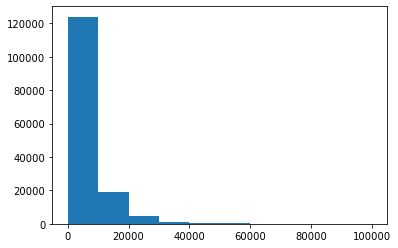

In [139]:
plt.hist(ytrain)

(array([3.8737e+04, 7.9460e+03, 2.1850e+03, 6.8800e+02, 2.3300e+02,
        9.6000e+01, 5.6000e+01, 3.8000e+01, 1.3000e+01, 8.0000e+00]),
 array([ -939.72116088,  8892.48924478, 18724.69965045, 28556.91005611,
        38389.12046177, 48221.33086744, 58053.5412731 , 67885.75167877,
        77717.96208443, 87550.1724901 , 97382.38289576]),
 <BarContainer object of 10 artists>)

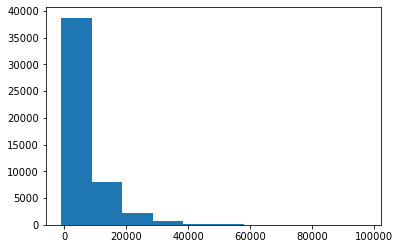

In [140]:
plt.hist(sub_)